This is draft work on the Methods and Results of our Proposal

**METHODS**

To answer the above broad and specific question, KNN regression was determined to be the best approach to assess the relationship between played hours to the age of the player. First, load the appropriate library's as below, to be used for accurate visualization and to utilize the correct code for wrangling: 

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(RColorBrewer)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Once there, we began to wrangle the data by first making gender into a vector to be factored, and then mutate the data such that both experience and gender can be considered as a factor.

In [3]:
players_data <- read_csv("https://raw.githubusercontent.com/GracieR90/dsci-100-2025w2-group-12/refs/heads/main/players.csv")

gender <- c("Male", "Female", "Non-binary", "Other", "Prefer not to say", "Two-Spirited")

players_mutate <- players_data |>
    mutate(
        experience = as.factor(experience),
        gender = as.factor(gender))

players_mutate

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Then we will visualize the data to see if there is any apparent relationship between played hours and age in the players dataset.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


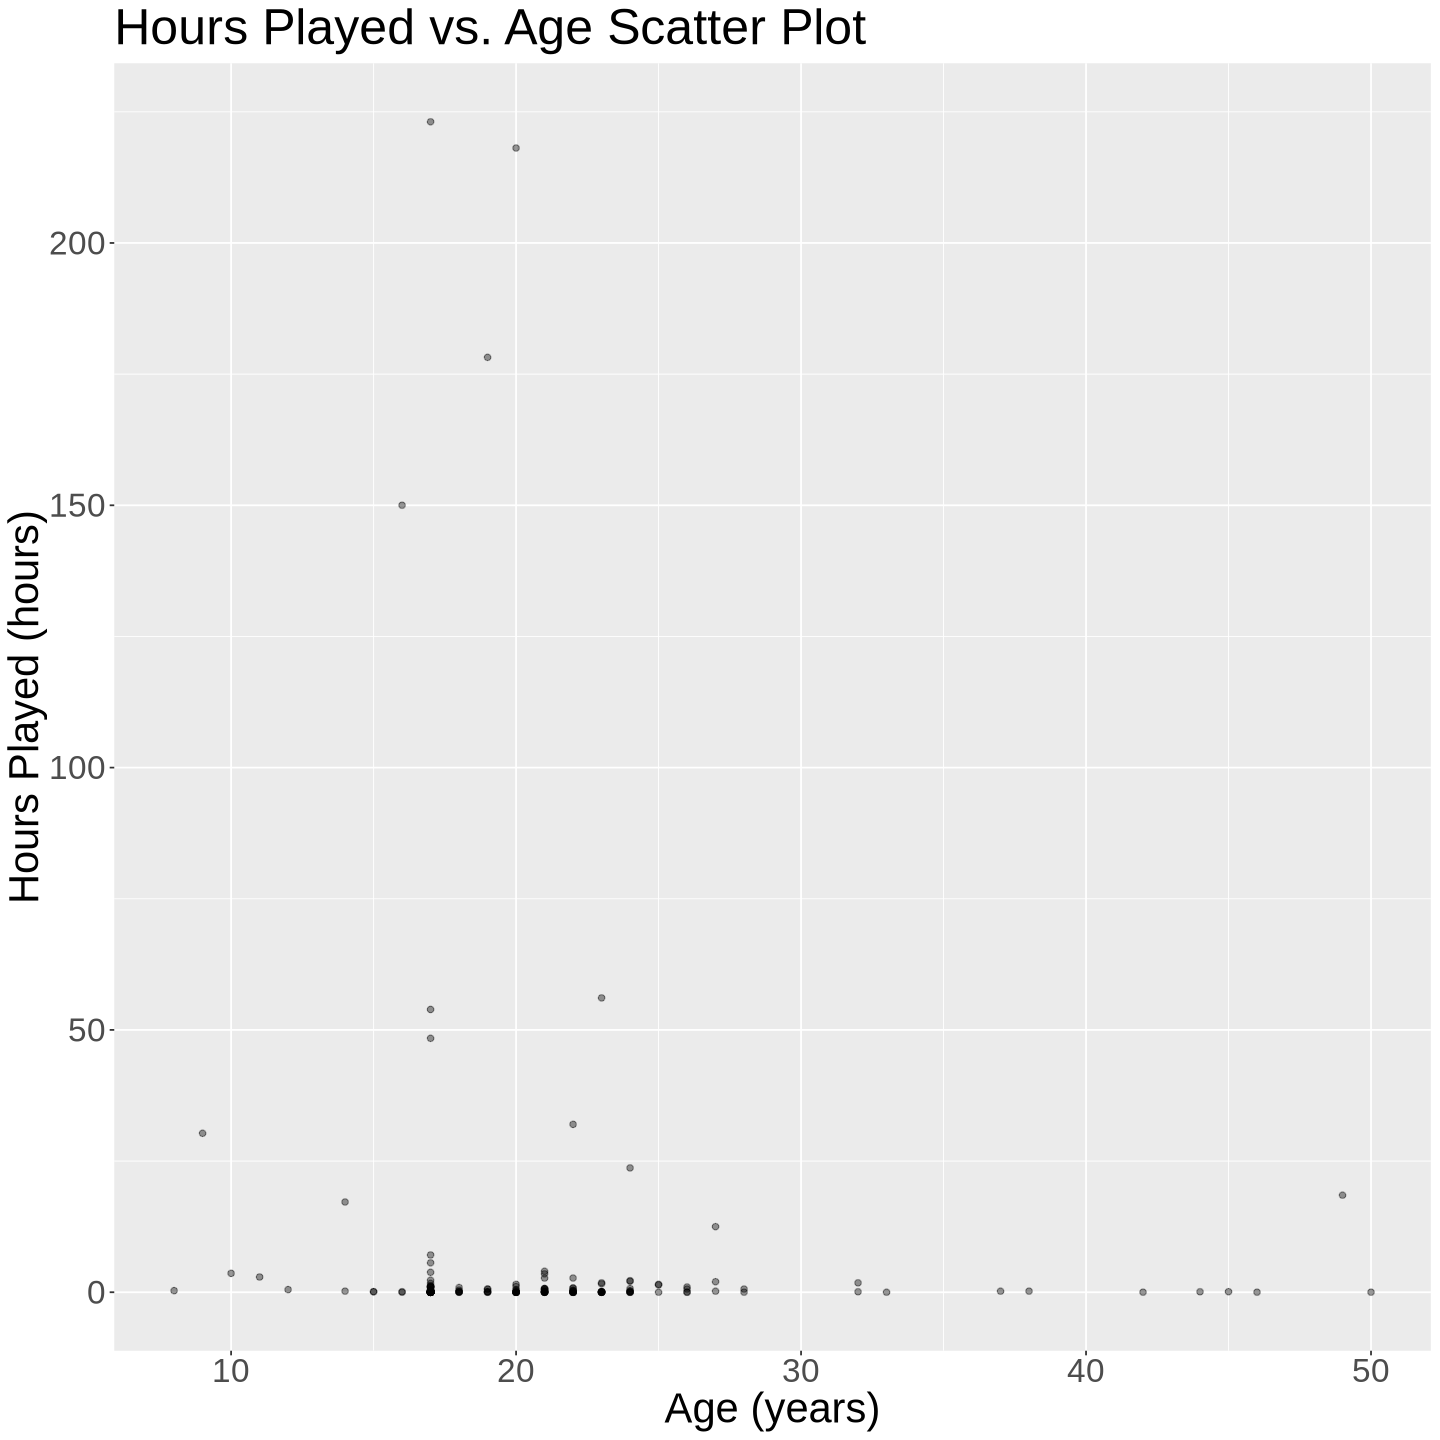

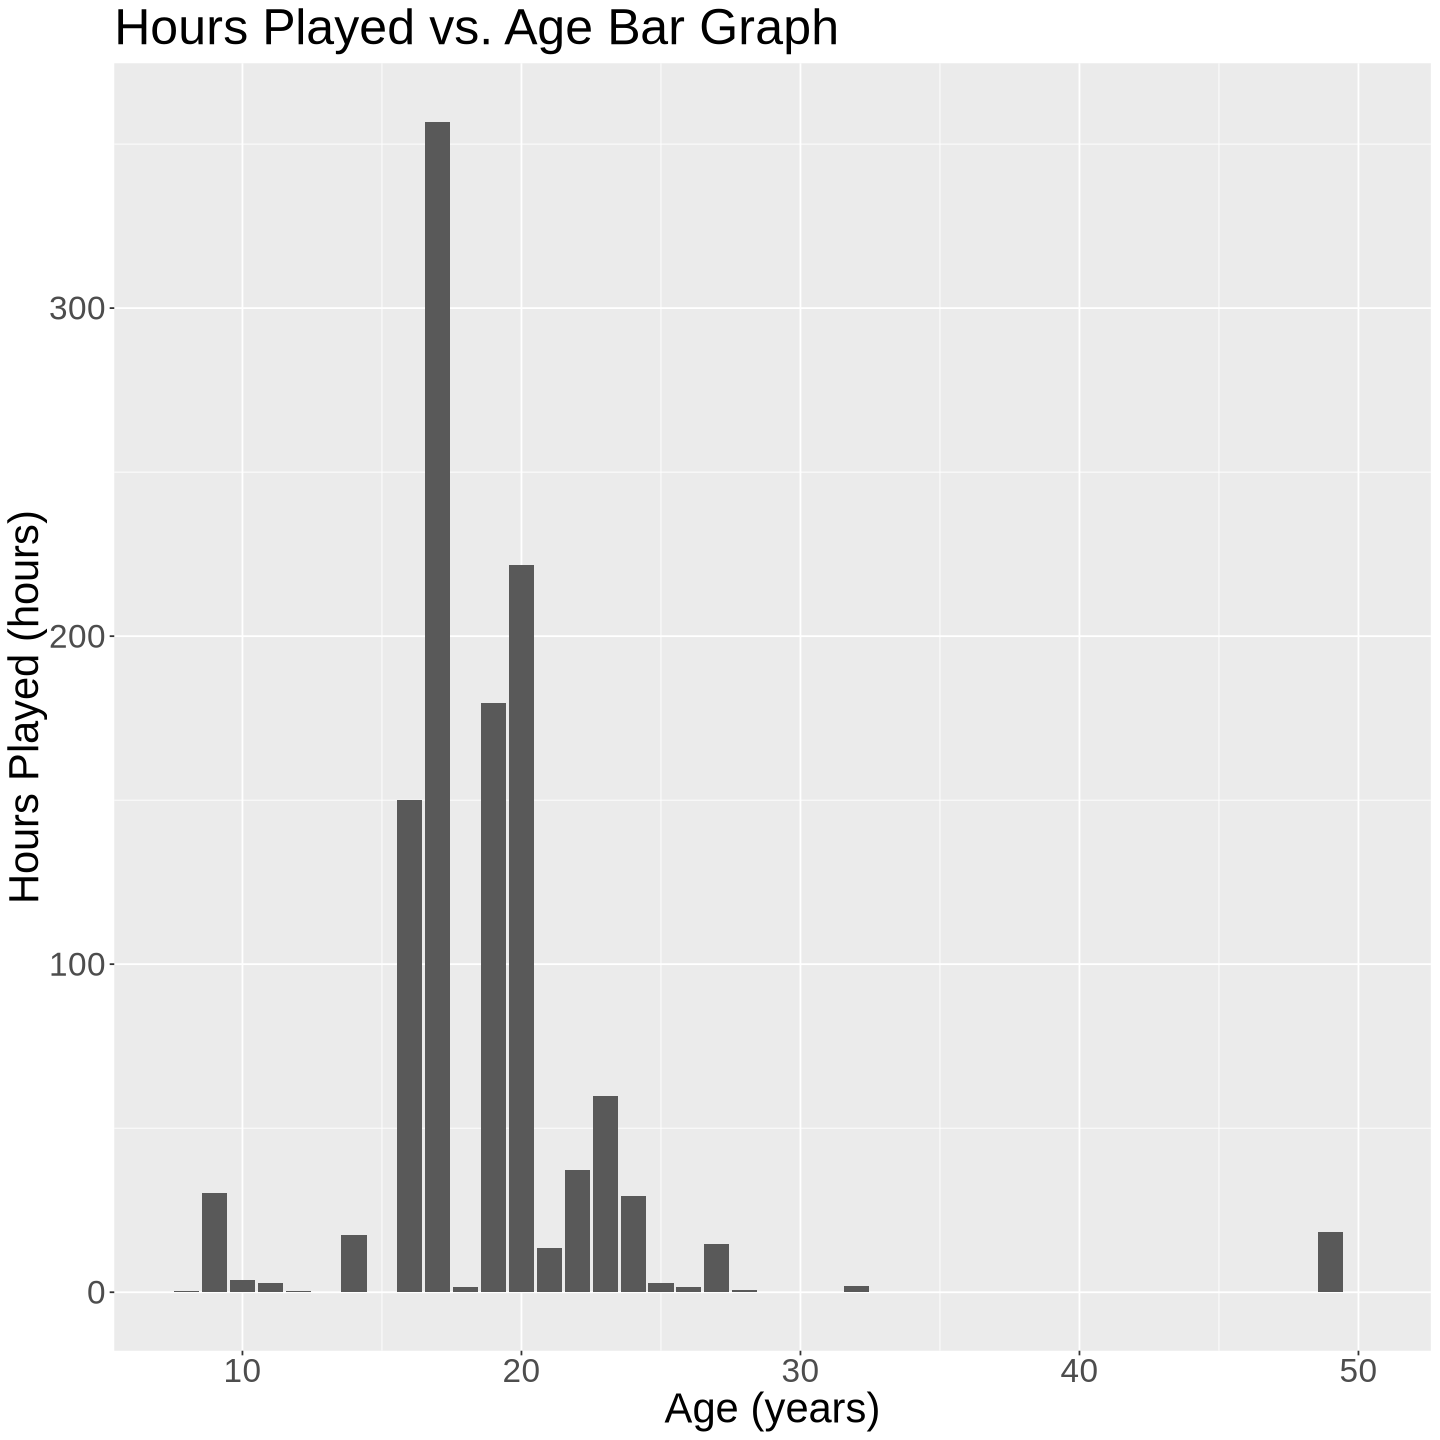

In [12]:
options(repr.plot.width = 12, repr.plot.height = 12)

Age_vs_played_hours_scatterplot <- players_mutate |>
        ggplot(aes(x = Age, y = played_hours)) +
        geom_point(alpha = 0.4) +
        labs(x = "Age (years)", y = "Hours Played (hours)", title = "Hours Played vs. Age Scatter Plot") +
        theme(text = element_text(size = 25))

Age_vs_played_hours_scatterplot

Age_vs_played_hours_bar <- players_mutate |>
        ggplot(aes(x = Age, y = played_hours)) +
        geom_bar(stat = "identity") +
        labs(x = "Age (years)", y = "Hours Played (hours)", title = "Hours Played vs. Age Bar Graph") +
        theme(text = element_text(size = 25))

Age_vs_played_hours_bar